# Implementing Clustering Algorithm to Open a New Coffee Shop in Surabaya

#### Introduction

Surabaya is one of the biggest metropolitan city in Indonesia, for various reason, people in Surabaya like to spend their leisure time discussing hobbies and many other things with coffee as their main beverage to be with, hence the term 'Ngopi' is popular among the ears of the people.

When we think about it from investor perspective, we should take advantage of this trend to develop a Coffee Shop, but of course, we need to do it with serious consideration. The location of the Coffee Shop is one of the most important things to consider to determine the success rate of the Coffee Shop itself, but, how can we determine the best possible location?

When will do Data Analysis to help us find the best possible location for our Coffee Shop.

#### Data and Sources

To solve the problem, we need the following data:
-	List of Kecamatan in Surabaya, we need to correctly determine the actual data of Kecamatan in Surabaya to perfectly analyze our data. (Kecamatan sometimes would be described as neighborhood, in our notebooks). We retrieve the data from Wikipedia page [1] using built in pandas function.
-	Geodata of Kecamatan in Surabaya, we need the geodata of Kecamatan in Surabaya to help us process the Foursquare API. We retrieve the data using geopy library in pandas.
-	List of Coffee Shop in Surabaya. We retrieve the data using Foursquare API. [2]

#### Approach

- Collecting Data as listed above
- Using geopy to add geolocation on our data
- Using Foursquare API to collect our needed venues(Coffee Shop)
- Apply K-means Algorithm to cluster our data
- Apply Folium in our clustered data to visualize it on the Map

### Importing Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import matplotlib.pyplot as plt # matplotlib library to plot histogram later

### Data Collecting

#### Importing Neighborhood/Kecamatan data from Wikipedia

In [2]:
# Collecting neighborhood/kecamatan data from wikipedia using pd.read_html
df = pd.read_html('https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Surabaya')[0]

# Removing unecessary columns and rows
df = df.drop(columns=['Kode Kemendagri', 'Jumlah Kelurahan', 'Daftar Kelurahan'])
df = df.rename(columns={"Kecamatan": "kecamatan"})

# We delete/drop TOTAL row
df = df.drop([0, 31])

In [3]:
df.head()

,kecamatan
1,Benowo
2,Bubutan
3,Bulak
4,Dukuh Pakis
5,Gayungan


In [4]:
# Getting the dimension of data
df.shape

(30, 1)

#### Using geopy library to import geolocation(lat and long)

In [5]:
# We are using Nominatim to get Geocode for each Neighborhood
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='vejryn@gmail.com')

# We use delay function to delay between geocoding calls to avoid denied access.
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Create location column from applied geocode.
df['location'] = df['kecamatan'].apply(geocode)

# Create point column containing longitude, latitude and altitude out of location column.
df['point'] = df['location'].apply(lambda loc:tuple(loc.point) if loc else None)

# Split point column into latitude, longitude and altitude column.
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)


In [6]:
# We delete unused column, because we only need Neighborhood and its geolocation
df = df.drop(['location', 'point', 'altitude'], axis=1)

#### Complete view of Neighborhood/Kecamatan Data and its Location

In [7]:
df

,kecamatan,latitude,longitude
1,Benowo,-7.228532,112.648143
2,Bubutan,-7.246596,112.731800
3,Bulak,-7.232046,112.784834
4,Dukuh Pakis,-7.291595,112.687224
5,Gayungan,-7.328102,112.724952
6,Genteng,-7.260499,112.745174
7,Gubeng,-7.284630,112.755632
8,Gunung Anyar,-7.338423,112.797441
9,Jambangan,-7.324331,112.715721
10,Karang Pilang,-7.332051,112.701807


In [8]:
df.shape

(30, 3)

### Exploring and Visualizing Neighborhoods/Kecamatan in Surabaya City

#### Locating Surabaya City

In [9]:
address = 'Surabaya, Jawa Timur'

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Surabaya are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Surabaya are -7.2459717, 112.7378266.


#### Visualizing Neighborhoods/Kecamatan in Surabaya CIty

In [10]:
map_surabaya = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, kecamatan in zip(df['latitude'], df['longitude'], df['kecamatan']):
    label = '{}'.format(kecamatan)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_surabaya)
    
map_surabaya

### Implementing Foursquare API to explore venues in Surabaya City

#### Defining Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'HTWUK53FIUTOTAIPNCRO4MKSOIMHZUR2OYOBUCM1T04CIJNW'
CLIENT_SECRET = 'L1WY1IFCIMBLVBCDNP1LTLGTLZQGN23SN5AMKZLXBXJGOMCS'
VERSION = '20180604'


print('My Credentials: ')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

My Credentials: 
CLIENT_ID: HTWUK53FIUTOTAIPNCRO4MKSOIMHZUR2OYOBUCM1T04CIJNW
CLIENT_SECRET: L1WY1IFCIMBLVBCDNP1LTLGTLZQGN23SN5AMKZLXBXJGOMCS


#### Locating top 30 venues within 3000 meters of Neighborhoods

In [12]:
LIMIT = 30
radius = 3000
venues = []

for lat, long, kecamatan in zip(df['latitude'], df['longitude'], df['kecamatan']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in results:
        venues.append((
        kecamatan,
        lat,
        long,
        venue['venue']['name'],
        venue['venue']['location']['lat'],
        venue['venue']['location']['lng'],
        venue['venue']['categories'][0]['name']))

#### Creating and Analyzing Venue Data collected from Foursquare API

In [13]:
# Creating venues dataframe from venues list value

venues_df = pd.DataFrame(venues)
venues_df.columns = ['kecamatan', 'latitude', 'longitude', 'venue_name', 'venue_latitude', 'venue_longitude', 'venue_category']
venues_df.head(10)

,kecamatan,latitude,longitude,venue_name,venue_latitude,venue_longitude,venue_category
0,Benowo,-7.228532,112.648143,Food Junction Grand Pakuwon,-7.250903,112.661927,Food Court
1,Benowo,-7.228532,112.648143,Pawon Ndeso,-7.243629,112.632808,Indonesian Restaurant
2,Benowo,-7.228532,112.648143,Stadion Gelora Bung Tomo,-7.223275,112.622938,Soccer Stadium
3,Benowo,-7.228532,112.648143,Indomaret,-7.237172,112.628458,Convenience Store
4,Bubutan,-7.246596,112.731800,Es Kacang Hijau H. Abdul Fani,-7.247216,112.740267,Food Truck
5,Bubutan,-7.246596,112.731800,CGV Cinemas,-7.254282,112.732692,Multiplex
6,Bubutan,-7.246596,112.731800,JW Marriott Hotel (Hotel JW Marriott),-7.259589,112.734653,Hotel
7,Bubutan,-7.246596,112.731800,Ayam Goreng Jakarta,-7.258213,112.732542,Fried Chicken Joint
8,Bubutan,-7.246596,112.731800,Depot Bu Rudy,-7.258632,112.728791,Indonesian Restaurant
9,Bubutan,-7.246596,112.731800,Tunjungan 5 XXI,-7.261345,112.739524,Movie Theater


In [14]:
venues_df.shape

(831, 7)

#### Identifying total venues returned for each neighborhood

In [15]:
venues_df.groupby(['kecamatan']).count()

,latitude,longitude,venue_name,venue_latitude,venue_longitude,venue_category
kecamatan,,,,,,
Benowo,4,4,4,4,4,4
Bubutan,30,30,30,30,30,30
Bulak,28,28,28,28,28,28
Dukuh Pakis,30,30,30,30,30,30
Gayungan,30,30,30,30,30,30
Genteng,30,30,30,30,30,30
Gubeng,30,30,30,30,30,30
Gunung Anyar,30,30,30,30,30,30
Jambangan,30,30,30,30,30,30


#### Identifying unique venue categories

In [16]:
print('There are {} unique venue categories.'.format(len(venues_df['venue_category'].unique())))

There are 114 unique venue categories.


#### Identifying if there are coffee shop in venue category

In [17]:
"Coffee Shop" in venues_df['venue_category'].unique()

True

### Analyzing Categorical Data of Venues in Each Neighborhood (Exploratory Data Analysis)

#### One Hot Encoding 

In [18]:
df_onehot = pd.get_dummies(venues_df[['venue_category']], prefix="", prefix_sep="")
df_onehot['kecamatan'] = venues_df['kecamatan']

In [19]:
column_list = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[column_list]
print(df_onehot.shape)
df_onehot.head()

(831, 115)


,kecamatan,Airport Service,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Court,Bed & Breakfast,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Building,Business Service,Café,Car Wash,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Herbs & Spices Store,Historic Site,History Museum,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lounge,Market,Massage Studio,Middle Eastern Restaurant,Miscellaneous Shop,Mosque,Movie Theater,Multiplex,Music School,Music Venue,Nightclub,Noodle House,Outdoor Supply Store,Padangnese Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Pub,Racetrack,Rest Area,Restaurant,Salad Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Theme Park,Turkish Restaurant,Udon Restaurant,Water Park,Yoga Studio
0,Benowo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Benowo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Benowo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Benowo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bubutan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Grouping neighborhood/kecamatan and assign mean of the frequency of each categories by neighborhood/kecamatan

In [20]:
df_group = df_onehot.groupby(['kecamatan']).mean().reset_index()
df_group

,kecamatan,Airport Service,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Court,Bed & Breakfast,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Building,Business Service,Café,Car Wash,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Herbs & Spices Store,Historic Site,History Museum,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lounge,Market,Massage Studio,Middle Eastern Restaurant,Miscellaneous Shop,Mosque,Movie Theater,Multiplex,Music School,Music Venue,Nightclub,Noodle House,Outdoor Supply Store,Padangnese Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Pub,Racetrack,Rest Area,Restaurant,Salad Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Theme Park,Turkish Restaurant,Udon Restaurant,Water Park,Yoga Studio
0,Benowo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bubutan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.133333,0.000000,0.000000,0.000000,0.133333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bulak,0.000000,0.000000,0.071429,0.000000,0.035714,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.03571

In [21]:
df_group.shape

(30, 115)

#### We will create a data frame containing coffee only shop as venue

In [22]:
df_coffeeshop = df_group[['kecamatan', 'Coffee Shop']]
df_coffeeshop = df_coffeeshop.rename(columns={"Coffee Shop": "coffee_shop"})

In [23]:
df_coffeeshop.head(10)

,kecamatan,coffee_shop
0,Benowo,0.000000
1,Bubutan,0.033333
2,Bulak,0.000000
3,Dukuh Pakis,0.233333
4,Gayungan,0.033333
5,Genteng,0.100000
6,Gubeng,0.066667
7,Gunung Anyar,0.133333
8,Jambangan,0.033333
9,Karang Pilang,0.000000


### Clustering Neighborhoods based on the presence of Coffee Shop

#### We will use Coffee Shop columns as variable for clustering, so we drop Neighborhoods/Kecamatan column first 

In [24]:
# number of clusters is set to 3
# use Coffee Shop column/variable to use in k-means clustering

df_cluster = df_coffeeshop.drop(['kecamatan'], 1)
kmeans = KMeans(n_clusters= 3, random_state=0).fit(df_cluster)

In [25]:
# check labels in generated clusters
kmeans.labels_[0:8]

array([0, 0, 0, 1, 0, 2, 2, 1], dtype=int32)

#### Add generated labels into df_coffeeshop

In [26]:
df_coffeeshop['cluster_labels'] = kmeans.labels_

In [27]:
df_coffeeshop.head(10)

,kecamatan,coffee_shop,cluster_labels
0,Benowo,0.000000,0
1,Bubutan,0.033333,0
2,Bulak,0.000000,0
3,Dukuh Pakis,0.233333,1
4,Gayungan,0.033333,0
5,Genteng,0.100000,2
6,Gubeng,0.066667,2
7,Gunung Anyar,0.133333,1
8,Jambangan,0.033333,0
9,Karang Pilang,0.000000,0


#### Merge the data containing the clusters and the data containing geolocation and use it as final data

In [28]:
df_final = df_coffeeshop.join(df.set_index("kecamatan"), on="kecamatan")

In [29]:
df_final

,kecamatan,coffee_shop,cluster_labels,latitude,longitude
0,Benowo,0.000000,0,-7.228532,112.648143
1,Bubutan,0.033333,0,-7.246596,112.731800
2,Bulak,0.000000,0,-7.232046,112.784834
3,Dukuh Pakis,0.233333,1,-7.291595,112.687224
4,Gayungan,0.033333,0,-7.328102,112.724952
5,Genteng,0.100000,2,-7.260499,112.745174
6,Gubeng,0.066667,2,-7.284630,112.755632
7,Gunung Anyar,0.133333,1,-7.338423,112.797441
8,Jambangan,0.033333,0,-7.324331,112.715721
9,Karang Pilang,0.000000,0,-7.332051,112.701807


In [30]:
df_final['coffee_shop'].value_counts()

0.033333    7
0.066667    6
0.000000    6
0.133333    4
0.100000    3
0.166667    2
0.083333    1
0.233333    1
Name: coffee_shop, dtype: int64

#### Visualising Surabaya City Map with Clustered Marker for each Kecamatan

In [31]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(3)
ys = [i+x+(i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

marker_colors = []
for lat, lng, kecamatan, cluster in zip(df_final['latitude'], df_final['longitude'], df_final['kecamatan'], df_final['cluster_labels']):
    label = folium.Popup('Kecamatan: ' + str(kecamatan) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
map_clusters

#### Cluster Distribution

As we see below, the concentration of Coffee Shop in Cluster 1 is High, we conclude that it's better to Develop a New Coffee Shop in Cluster 2 or 0.

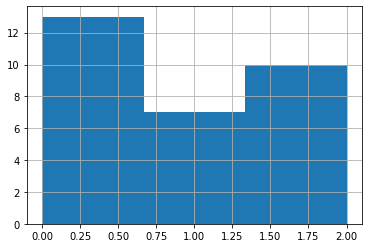

In [32]:
df_final['cluster_labels'].hist(bins=3);

### This conclude my analysis, full explanation is available on Blogpost.
[Linkedin Blogpost](https://www.linkedin.com/post/edit/6693932214461329408/)